In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

## 자이로스코프 데이터의 이상값을 시각화, 처리

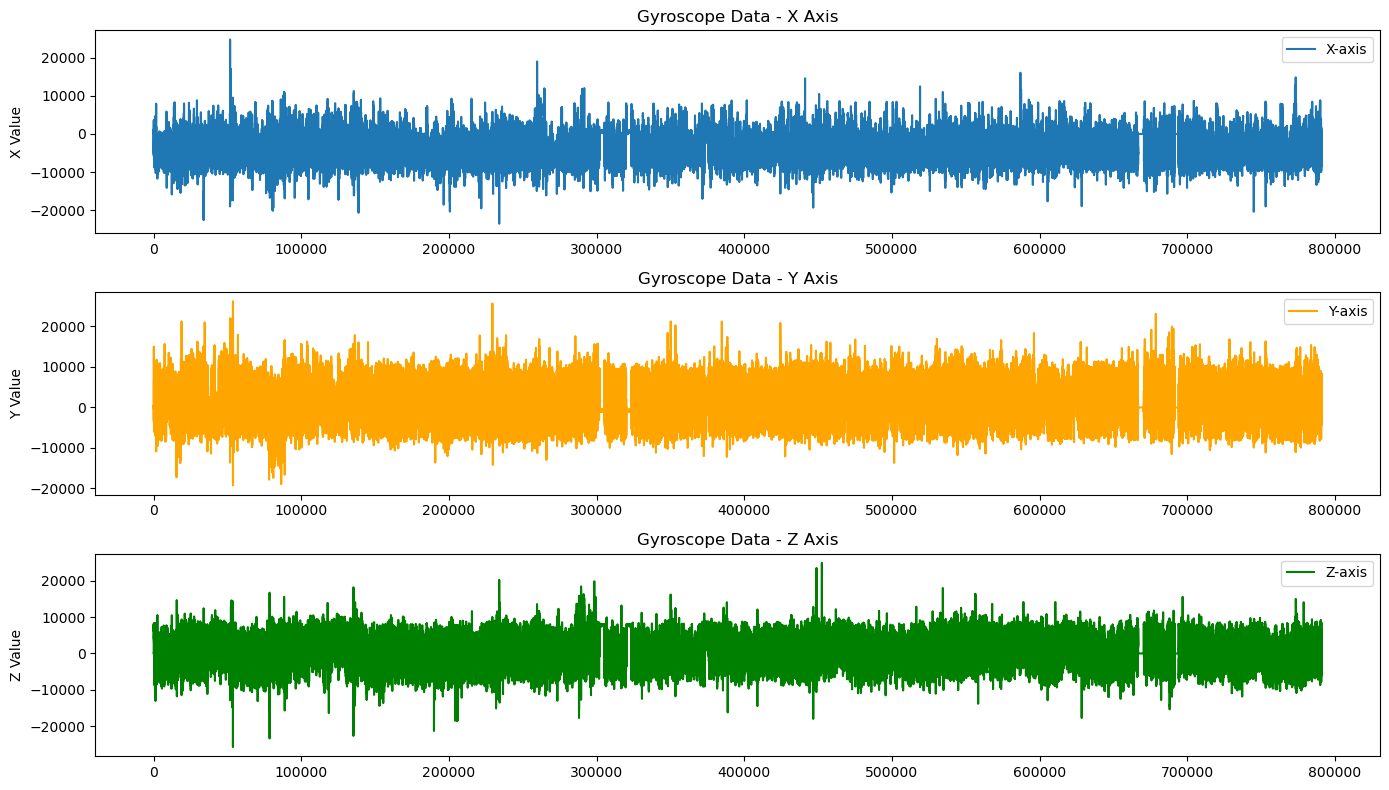

Data after Z-score based outlier removal:
                   X              Y              Z
count  781774.000000  781774.000000  781774.000000
mean    -4106.352975    2800.312908     660.939449
std      2729.556081    4746.775826    3741.792482
min    -12736.000000  -11520.000000  -10560.000000
25%     -6336.000000    -576.000000   -1664.000000
50%     -4160.000000    3520.000000     320.000000
75%     -2304.000000    7104.000000    3264.000000
max      4736.000000   16960.000000   11904.000000
Data after IQR based outlier removal:
                   X              Y              Z
count  777424.000000  777424.000000  777424.000000
mean    -4144.251567    2827.871636     659.007425
std      2674.900228    4737.077340    3722.407555
min    -12480.000000  -12224.000000   -9024.000000
25%     -6336.000000    -512.000000   -1664.000000
50%     -4160.000000    3584.000000     320.000000
75%     -2304.000000    7104.000000    3200.000000
max      3904.000000   18560.000000   10624.000000
Da

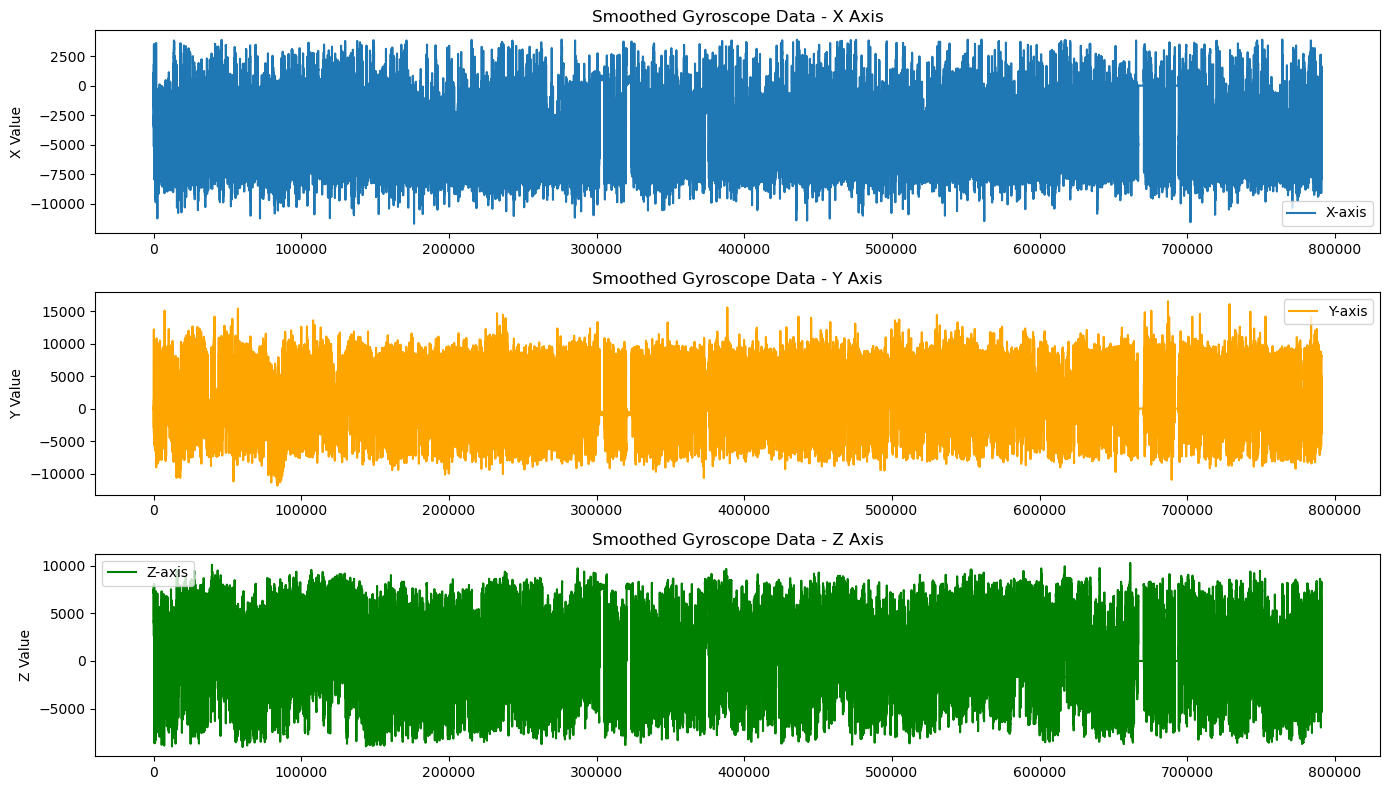

In [7]:
# 데이터 불러오기
file_path = './원본 데이터/동기화 데이터.csv'
data = pd.read_csv(file_path)

# 자이로스코프 데이터 시각화
plt.figure(figsize=(14, 8))

plt.subplot(3, 1, 1)
plt.plot(data['X'], label='X-axis')
plt.title('Gyroscope Data - X Axis')
plt.ylabel('X Value')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(data['Y'], label='Y-axis', color='orange')
plt.title('Gyroscope Data - Y Axis')
plt.ylabel('Y Value')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(data['Z'], label='Z-axis', color='green')
plt.title('Gyroscope Data - Z Axis')
plt.ylabel('Z Value')
plt.legend()

plt.tight_layout()
plt.show()

# z-스코어를 계산하는 함수 직접 구현
def zscore_manual(data):
    return (data - data.mean()) / data.std()

# 이상값 제거 방법 1: Z-스코어 기반 제거 (직접 구현)
def remove_outliers_z_score(df, threshold=3):
    z_scores = np.abs(zscore_manual(df[['X', 'Y', 'Z']]))
    return df[(z_scores < threshold).all(axis=1)]

# 이상값 제거 방법 2: IQR 기반 제거
def remove_outliers_iqr(df):
    Q1 = df[['X', 'Y', 'Z']].quantile(0.25)
    Q3 = df[['X', 'Y', 'Z']].quantile(0.75)
    IQR = Q3 - Q1
    return df[~((df[['X', 'Y', 'Z']] < (Q1 - 1.5 * IQR)) | (df[['X', 'Y', 'Z']] > (Q3 + 1.5 * IQR))).any(axis=1)]

# 이상값 대체 방법: 중앙값으로 대체
def replace_outliers_with_median(df):
    Q1 = df[['X', 'Y', 'Z']].quantile(0.25)
    Q3 = df[['X', 'Y', 'Z']].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df[['X', 'Y', 'Z']] < (Q1 - 1.5 * IQR)) | (df[['X', 'Y', 'Z']] > (Q3 + 1.5 * IQR))).any(axis=1)
    df.loc[outliers, ['X', 'Y', 'Z']] = df[['X', 'Y', 'Z']].median()
    return df

# 이상값 제거 후 데이터 확인 (Z-스코어 방식)
data_cleaned_z = remove_outliers_z_score(data)
print("Data after Z-score based outlier removal:")
print(data_cleaned_z[['X', 'Y', 'Z']].describe())

# 이상값 제거 후 데이터 확인 (IQR 방식)
data_cleaned_iqr = remove_outliers_iqr(data)
print("Data after IQR based outlier removal:")
print(data_cleaned_iqr[['X', 'Y', 'Z']].describe())

# 이상값 대체 후 데이터 확인 (중앙값 대체)
data_replaced = replace_outliers_with_median(data)
print("Data after replacing outliers with median:")
print(data_replaced[['X', 'Y', 'Z']].describe())

# 데이터 스무딩 (이동 평균)
def smooth_data(df, window_size=5):
    df[['X', 'Y', 'Z']] = df[['X', 'Y', 'Z']].rolling(window=window_size, center=True).mean()
    return df.dropna()

data_smoothed = smooth_data(data)
print("Data after smoothing:")
print(data_smoothed[['X', 'Y', 'Z']].describe())

# 시각화: 정제된 데이터 시각화
plt.figure(figsize=(14, 8))

plt.subplot(3, 1, 1)
plt.plot(data_smoothed['X'], label='X-axis')
plt.title('Smoothed Gyroscope Data - X Axis')
plt.ylabel('X Value')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(data_smoothed['Y'], label='Y-axis', color='orange')
plt.title('Smoothed Gyroscope Data - Y Axis')
plt.ylabel('Y Value')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(data_smoothed['Z'], label='Z-axis', color='green')
plt.title('Smoothed Gyroscope Data - Z Axis')
plt.ylabel('Z Value')
plt.legend()

plt.tight_layout()
plt.show()


## 데이터 로그 변환